In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка путей

In [16]:
src_path = Path('.').absolute().parents[0]
sys.path.insert(0, f'{src_path}')
sys.path[0]

'/Users/sitd1/0_python_projects/danyad/src'

# Чтение файла

In [17]:
data_folder = src_path / 'data'

In [18]:
df = pd.read_csv(data_folder / 'data.csv', sep=';')

In [24]:
print(df.shape)
df.head(2)

(84, 18)


,Z1,Z2,X1,X2,X3,X4,X5,X6,X7,Z3,Z4,Z5,Z6,X8,Z7,Z8,X9,Y
0,Ж,Гастрошунтирование,52.021918,4.619178,45.724737,40.771224,30.483158,3500,25.529645,3,Да,Да,Да,9.136986,Нет,Комбинированная терапия без инсулина,0.075,0.059
1,Ж,Гастрошунтирование,52.046575,4.871233,45.785640,44.953174,29.136316,2100,27.887617,2,Да,Да,Да,2.238356,Нет,Монотерапия без инсулина,0.065,0.059


# Предподготовка переменных

In [29]:
target_name = 'Y'
features = df.columns.drop(target_name)
features_categorical = [el for el in features if 'z' in el.lower()]
features_numerical = features.difference(features_categorical)

# Исследование данных

## Таргетная переменная

### Проверка на отсутствующие значения

In [179]:
df[target_name].isna().any()

False

### Проверка типа данных

In [181]:
df[target_name].dtype

dtype('float64')

### Просмотр распределения данных

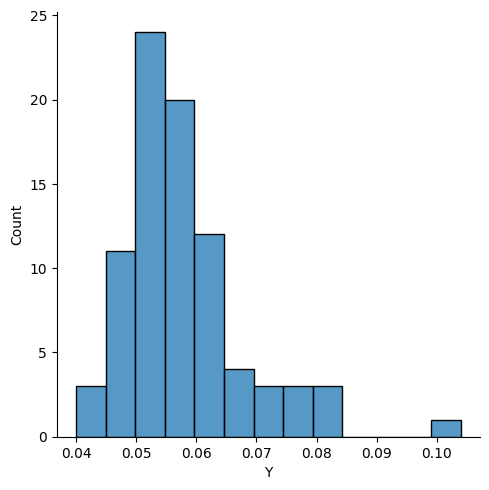

In [171]:
sns.displot(df[target_name])

### Исследование выбросов

<Axes: ylabel='Y'>

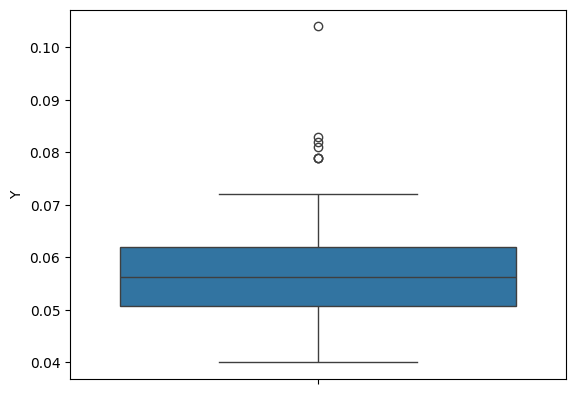

In [172]:
sns.boxplot(df[target_name])

## Категориальные признаки

### Проверка на отсутствующие значения

In [187]:
na_mask_feat_cat = df[features_categorical].isna().any()
na_columns = na_mask_feat_cat[na_mask_feat_cat].index
df[na_columns].isna().sum()

Z3    2
Z7    1
dtype: int64

In [191]:
na_row_mask = df[na_columns].isna().any(axis=1)
df[na_row_mask]

,Z1,Z2,X1,X2,X3,X4,X5,X6,X7,Z3,Z4,Z5,Z6,X8,Z7,Z8,X9,Y
48,Ж,Гастрошунтирование,48.638356,5.635616,46.294554,45.165418,32.142723,2400,27.475630,2,Да,Да,Нет,3.564384,NaN,Монотерапия без инсулина,0.074,0.060
81,Ж,Билиопанкреатическое шунтирование,53.813699,14.736986,60.086525,56.080756,34.049031,3500,31.244993,NaN,Нет,Нет,Да,14.586301,Нет,Комбинированная терапия без инсулина,0.150,0.058
82,Ж,Билиопанкреатическое шунтирование,34.427397,5.043836,42.448980,42.448980,30.367347,4800,26.122449,NaN,Да,Да,Нет,2.265753,Да,Монотерапия без инсулина,0.075,0.054


Нужно принять решение, что делаем с колонками z3 и z2

In [156]:
def get_displot(local_df, feat_cat, target_name, ax):
    categories = local_df[feat_cat].unique()
    for category in categories:
        sns.histplot(
            data=local_df[local_df[feat_cat] == category],
            x=target_name,
            ax=ax,
            alpha=0.5,
            label=category,
            kde=True,
            stat='density'
        )

    plt.legend(title='Z8')

In [157]:
df[features_categorical].describe()

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8
count,84,84,82,84,84,84,83,84
unique,2,3,4,3,3,3,4,3
top,Ж,Гастрошунтирование,3,Да,Да,Да,Нет,Комбинированная терапия без инсулина
freq,63,35,31,69,66,52,40,39


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/sitd1/Library/Caches/pypoetry/virtualenvs/danyad-IgEVFd02-py3.11/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


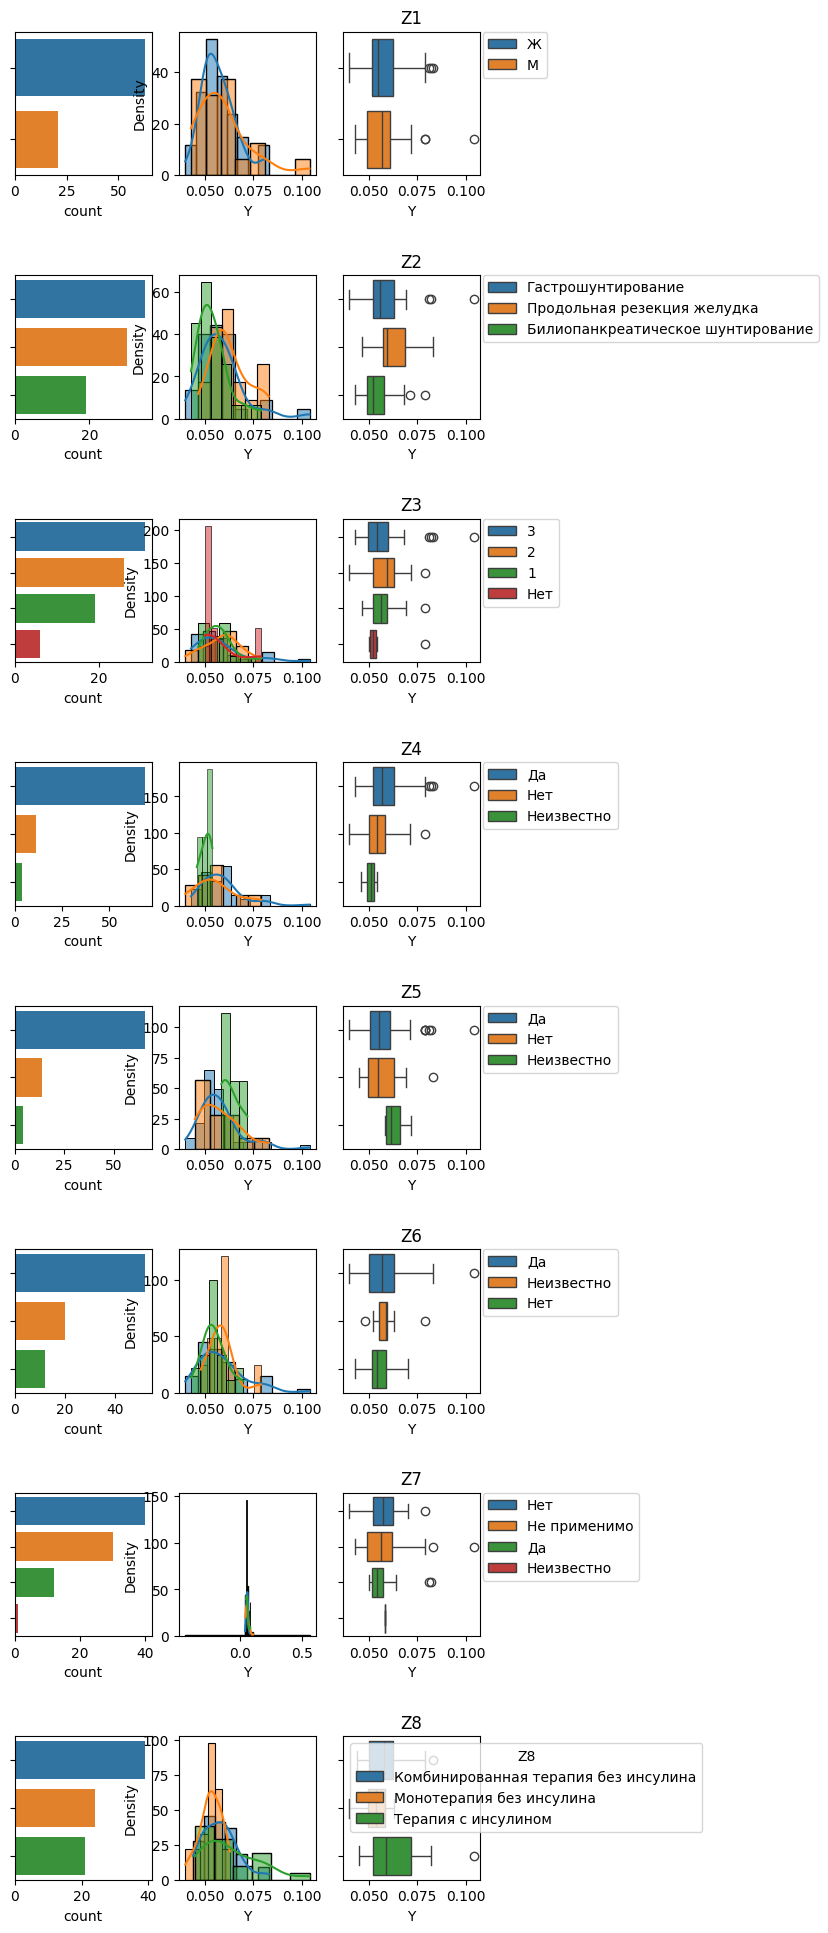

In [169]:
fig, axes = plt.subplots(nrows=len(features_categorical), ncols=3, figsize=(6, 3*len(features_categorical)))

for i, feat_cat in enumerate(features_categorical):
    # barplot
    local_s = df[feat_cat]
    value_counts = local_s.value_counts()
    ax0 = axes[i, 0]
    sns.barplot(
        x=value_counts,
        y=value_counts.index,
        hue=value_counts.index,
        orient='h',
        ax=ax0,
        align='edge'
    )
    ax0.set_ylabel('')
    ax0.set_yticklabels('')
    # boxplot
    local_df = df[[feat_cat, target_name]]
    ax1 = axes[i, 2]
    sns.boxplot(
        x=target_name,
        y=feat_cat,
        data=local_df,
        hue=feat_cat,
        ax=ax1,
        legend=True
    )
    ax1.set_ylabel('')
    ax1.set_yticklabels('')
    ax1.set_title(feat_cat)
    ax1.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad=0)
    # displot
    ax2 = axes[i, 1]
    get_displot(local_df, feat_cat, target_name, ax2)
    
plt.subplots_adjust(hspace=0.7)      
plt.show()

## Номинативные признаки

In [192]:
df[features_numerical].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,48.464188,6.698500,49.259210,46.561753,32.271409,3417.738095,28.253120,7.452642,0.080980
std,7.944931,3.497862,7.568142,6.733606,5.857282,521.139510,5.128803,5.754968,0.023069
min,30.912329,3.668493,33.950617,31.250000,21.971336,1900.000000,19.571681,0.249315,0.053000
25%,42.526027,4.356164,44.993549,42.071365,28.480144,3200.000000,25.276806,2.823973,0.066750
50%,49.758904,5.028767,47.656458,45.328099,31.230432,3500.000000,27.095693,5.961644,0.075000
75%,54.218493,6.900000,53.820885,50.409825,34.694789,3700.000000,31.244993,11.190411,0.086250
max,64.441096,18.476712,69.333333,64.814815,53.146259,5000.000000,44.962658,21.693151,0.190000


### Проверка на отсутствующие значения

In [193]:
df[features_numerical].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,48.464188,6.698500,49.259210,46.561753,32.271409,3417.738095,28.253120,7.452642,0.080980
std,7.944931,3.497862,7.568142,6.733606,5.857282,521.139510,5.128803,5.754968,0.023069
min,30.912329,3.668493,33.950617,31.250000,21.971336,1900.000000,19.571681,0.249315,0.053000
25%,42.526027,4.356164,44.993549,42.071365,28.480144,3200.000000,25.276806,2.823973,0.066750
50%,49.758904,5.028767,47.656458,45.328099,31.230432,3500.000000,27.095693,5.961644,0.075000
75%,54.218493,6.900000,53.820885,50.409825,34.694789,3700.000000,31.244993,11.190411,0.086250
max,64.441096,18.476712,69.333333,64.814815,53.146259,5000.000000,44.962658,21.693151,0.190000


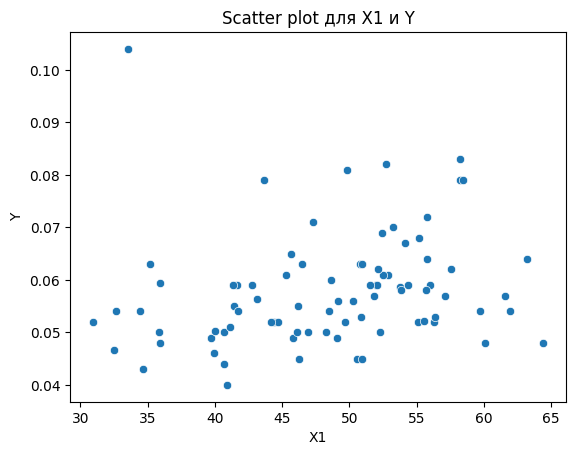

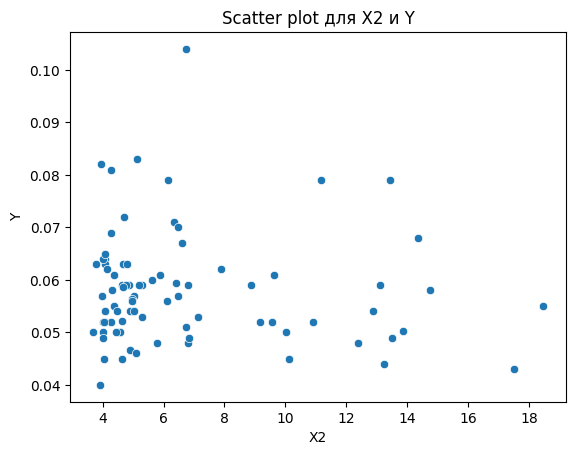

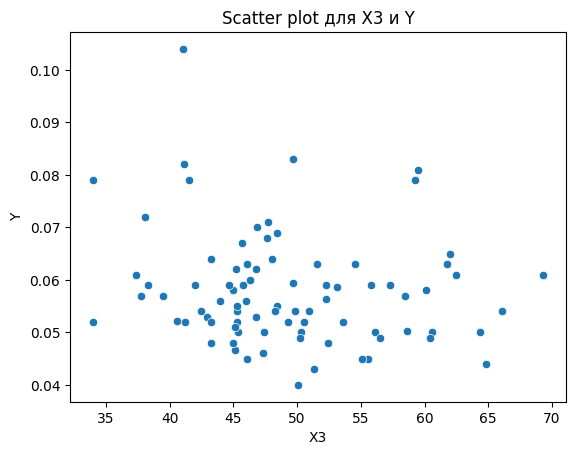

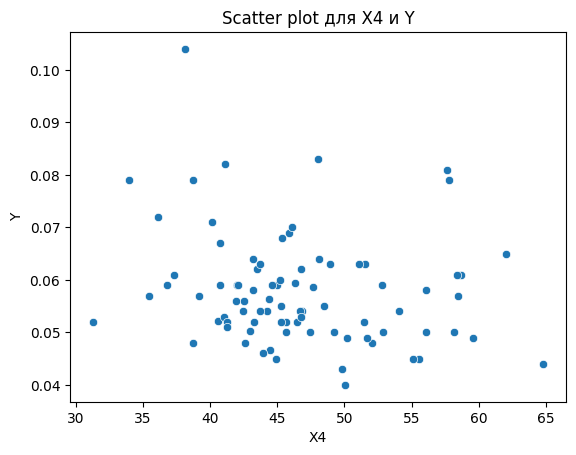

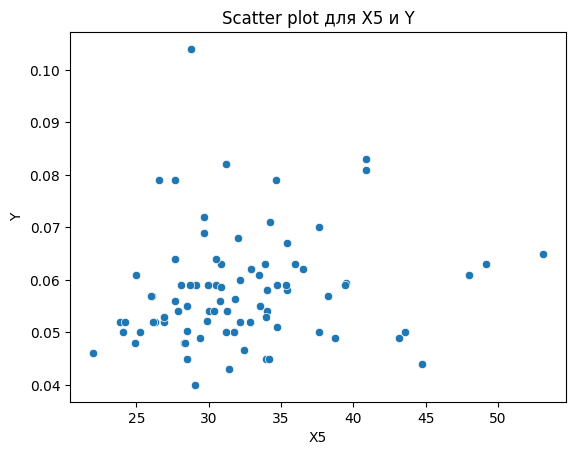

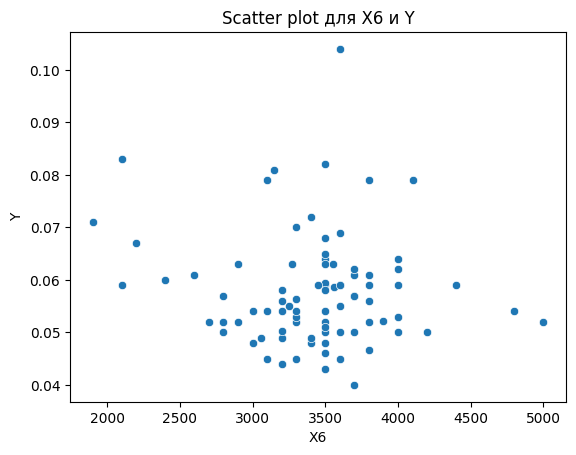

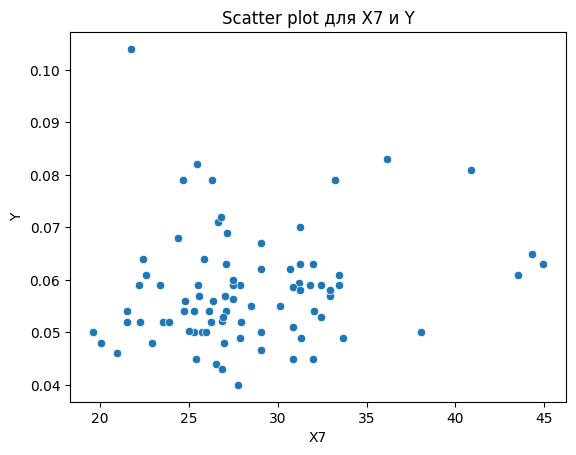

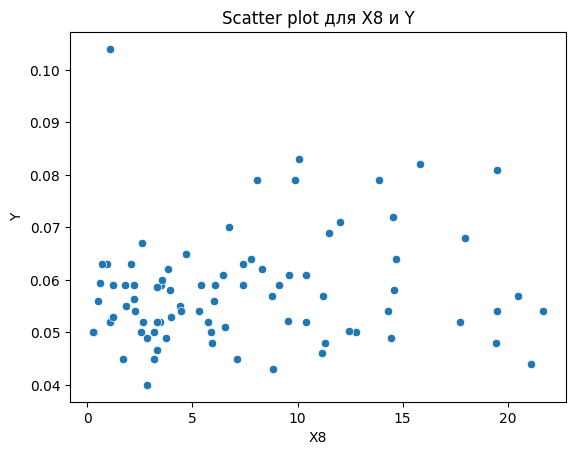

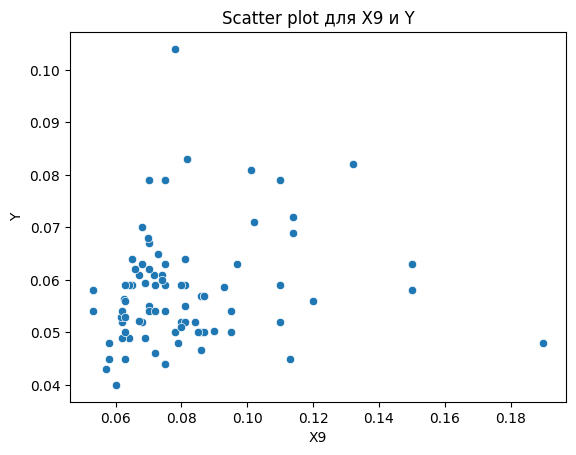

In [177]:
for feat_num in features_numerical:
    sns.scatterplot(x=df[feat_num], y=df[target_name])
    plt.title(f'Scatter plot для {feat_num} и {target_name}')
    plt.show()